# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

<IPython.core.display.Javascript object>


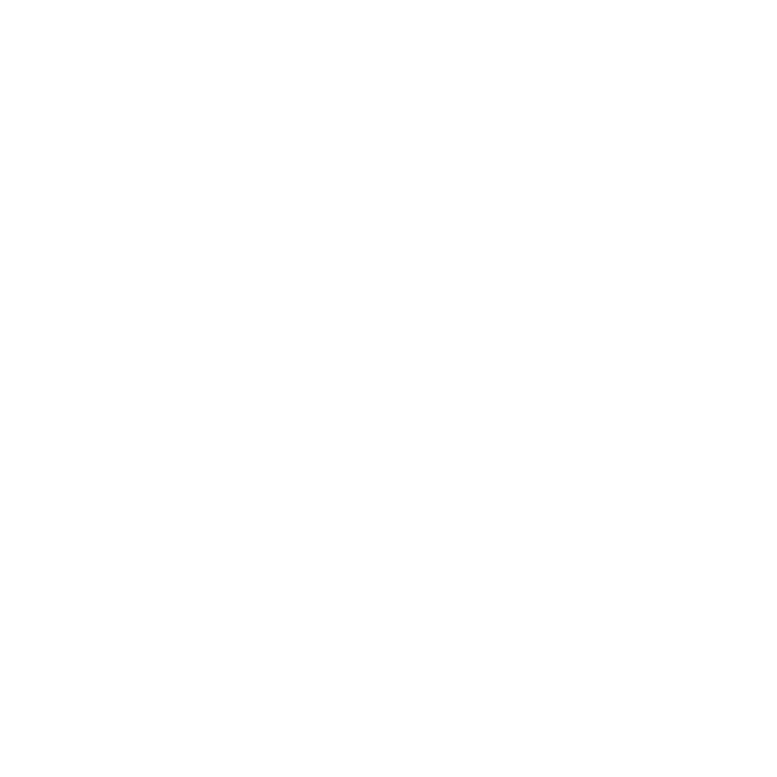

In [255]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [256]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
binsize = 'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89'
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/{}.csv'.format(binsize))

## Check data

In [257]:
#2025 records are lone pairs = each day only has either min or max:

## Create a dataframe where per ID, Date there is only 1 rec
size = df.groupby(['ID', 'Date']).size()
size1 = size[size==1]
dt = pd.DataFrame(size1, columns={'size'}).reset_index()
dt.shape
dt.head()

## Now zip ID, Date into paired values in a list
size1list =  list(zip(dt['ID'], dt['Date']))

## Method1: Use named function
def matching(x):
    return x in size1list
#df1 = df[list(map(matching, list(zip(df['ID'], df['Date']))))]

## Method2: Use unnamed lambda function
df1 = df[list(map(lambda x: x in size1list, list(zip(df['ID'], df['Date']))))]

df1.shape
df1.sort_values(['ID', 'Date']).head()

## Method3 (preferred)
#df2=df[df.apply(lambda row: (row['ID'], row['Date']) in size1list, axis=1)]
#df2.equals(df1)

(2025, 3)

,ID,Date,size
0,USC00200032,2005-01-19,1
1,USC00200032,2005-01-30,1
2,USC00200032,2005-02-05,1
3,USC00200032,2005-03-13,1
4,USC00200032,2005-03-31,1


(2025, 4)

,ID,Date,Element,Data_Value
96055,USC00200032,2005-01-19,TMAX,0
107809,USC00200032,2005-01-30,TMAX,17
14997,USC00200032,2005-02-05,TMIN,-56
14805,USC00200032,2005-03-13,TMIN,-117
78510,USC00200032,2005-03-31,TMAX,172


In [258]:
#%%timeit -n 10
## Method2: Use unnamed lambda function
#df1 = df[list(map(lambda x: x in size1list, list(zip(df['ID'], df['Date']))))]

In [259]:
#%%timeit -n 10
## Method3: pass each row values as tuple
#df2=df[df.apply(lambda row: (row['ID'], row['Date']) in size1list, axis=1)]

In [260]:
#Number of stations
df['ID'].nunique()
df[['ID']].groupby('ID').size()

#Date Range
# dt[['Date']].groupby('Date').size()
dt1 = df.copy()
dt1 = dt1.set_index('Date')
dt1.index = pd.to_datetime(dt1.index).to_period('M')
month = pd.DataFrame(dt1.groupby(dt1.index).size(), columns={'size'})
month.index[0]; month.index[-1]
%matplotlib inline
#month.plot(figsize=(12,6))

#fig = plt.figure(figsize=(10,6))
##fig, ax = plt.subplots(fig, ax = plt.subplots())
#plt.plot(month.index.to_timestamp(), month['size'])

24

ID
USC00200032    7844
USC00200220    3511
USC00200228    8033
USC00200230    8032
USC00200842    5739
USC00201250    5391
USC00201502    7871
USC00202308    7920
USC00203712    6487
USC00205050    7372
USC00205450    1193
USC00205451    7829
USC00205563    6497
USC00205822    8010
USC00207308    7550
USC00207312    7613
USC00207320    4968
USC00208080    7471
USC00208202    7857
USC00208972    5943
USW00004848    7944
USW00014833    8031
USW00014853    8011
USW00094889    7968
dtype: int64

Period('2005-01', 'M')

Period('2015-12', 'M')

## Enough playing around. Now work on the dataset.

In [261]:
#Subset to just 2005 -2014
binsize = 'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89'
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/{}.csv'.format(binsize))
df = df.set_index('Date')
df.head()
df.index = pd.to_datetime(df.index)
df14 = df['2005':'2014'].sort_index()
print('Data now subset to date between {} - {}'.format(df14.index[0], df14.index[-1]))

,ID,Element,Data_Value
Date,,,
2014-11-12,USW00094889,TMAX,22
2009-04-29,USC00208972,TMIN,56
2008-05-26,USC00200032,TMAX,278
2005-11-11,USC00205563,TMAX,139
2014-02-27,USC00200230,TMAX,-106


Data now subset to date between 2005-01-01 00:00:00 - 2014-12-31 00:00:00


#### Now get max of TMAX and min of TMIN regardless of station ID

In [262]:
#Now get max of TMAX and min of TMIN regardless of station ID
import numpy as np
table = df14.pivot_table(index=df14.index.date, columns='Element', values='Data_Value', aggfunc=[np.max, np.min])
# table.head()
# table.columns
table = table.loc[: ,[('amax','TMAX'), ('amin','TMIN')]]
table.columns = table.columns.droplevel()
table.head().append(table.tail())

Element,TMAX,TMIN
2005-01-01,156,-56
2005-01-02,139,-56
2005-01-03,133,0
2005-01-04,39,-39
2005-01-05,33,-94
2014-12-27,111,-28
2014-12-28,133,-60
2014-12-29,89,-110
2014-12-30,33,-111
2014-12-31,-28,-138


In [263]:
#Verify min and max temp
mx = df14[df14['Element']=='TMAX'].groupby(df14[df14['Element']=='TMAX'].index.date)['Data_Value'].agg({'TMAX':max}).head()
mn = df14[df14['Element']=='TMIN'].groupby(df14[df14['Element']=='TMIN'].index.date)['Data_Value'].agg({'TMIN':min}).head()
all(mx.assign(TMIN=mn)==table.head())

mx = df14[df14['Element']=='TMAX'].groupby(df14[df14['Element']=='TMAX'].index.date)['Data_Value'].agg({'TMAX':max}).tail()
mn = df14[df14['Element']=='TMIN'].groupby(df14[df14['Element']=='TMIN'].index.date)['Data_Value'].agg({'TMIN':min}).tail()
all(mx.assign(TMIN=mn)==table.tail())

#Pick one day to look at
df.loc['2005-01-04'][df.loc['2005-01-04'].apply(lambda row: row['Element']=='TMAX', axis=1)].sort_values('Data_Value', ascending=False)

True

True

,ID,Element,Data_Value
Date,,,
2005-01-04,USC00205451,TMAX,39
2005-01-04,USC00207308,TMAX,33
2005-01-04,USC00208080,TMAX,33
2005-01-04,USC00205822,TMAX,33
2005-01-04,USC00200842,TMAX,28
2005-01-04,USC00205563,TMAX,28
2005-01-04,USC00208202,TMAX,28
2005-01-04,USC00207312,TMAX,28
2005-01-04,USC00200228,TMAX,28


### Get min and max temp per day across years

In [264]:
#First format index to mm-dd
table.index = pd.to_datetime(table.index).strftime('%m-%d')
table.head().append(table.tail())

Element,TMAX,TMIN
01-01,156,-56
01-02,139,-56
01-03,133,0
01-04,39,-39
01-05,33,-94
12-27,111,-28
12-28,133,-60
12-29,89,-110
12-30,33,-111
12-31,-28,-138


In [265]:
#Check mm-dd index
len(list(table.index))
# set(table.index)

#Check volume per mm-dd -- expect n=10
t = pd.DataFrame(table.groupby(table.index).size(), columns={'size'})
t[t['size']!=10]

#Remove index=02-29, n=2
table=table.drop('02-29')
len(table)

3652

,size
02-29,2


3650

In [266]:
# Aggregate temp values
table.sort_index().head(20)
table.sort_index().tail(20)

Element,TMAX,TMIN
01-01,156,-56
01-01,144,-94
01-01,22,-128
01-01,28,-160
01-01,-5,-156
01-01,39,-50
01-01,-56,-128
01-01,128,-44
01-01,39,-39
01-01,100,-22


Element,TMAX,TMIN
12-30,0,-139
12-30,89,-72
12-30,111,-11
12-30,94,-78
12-30,78,-122
12-30,33,-44
12-30,33,-111
12-30,11,-144
12-30,39,-28
12-30,117,-128


In [267]:
table1 = table.groupby(level=0).agg({'TMAX':np.max, 'TMIN': np.min})
table1.head().append(table1.tail())
len(table1)

,TMAX,TMIN
01-01,156,-160
01-02,139,-267
01-03,133,-267
01-04,106,-261
01-05,128,-150
12-27,189,-138
12-28,194,-166
12-29,128,-150
12-30,117,-144
12-31,139,-150


365

In [268]:
#Now reset index to full calendar dates to make plotting easier
#Make sure to pick a year that is not a leap year
table1.index=pd.date_range('2014-01-01', periods=365)
# table1.index[0]; table1.index[-1]
table1.head(); table1.tail()

,TMAX,TMIN
2014-01-01,156,-160
2014-01-02,139,-267
2014-01-03,133,-267
2014-01-04,106,-261
2014-01-05,128,-150


,TMAX,TMIN
2014-12-27,189,-138
2014-12-28,194,-166
2014-12-29,128,-150
2014-12-30,117,-144
2014-12-31,139,-150


<IPython.core.display.Javascript object>


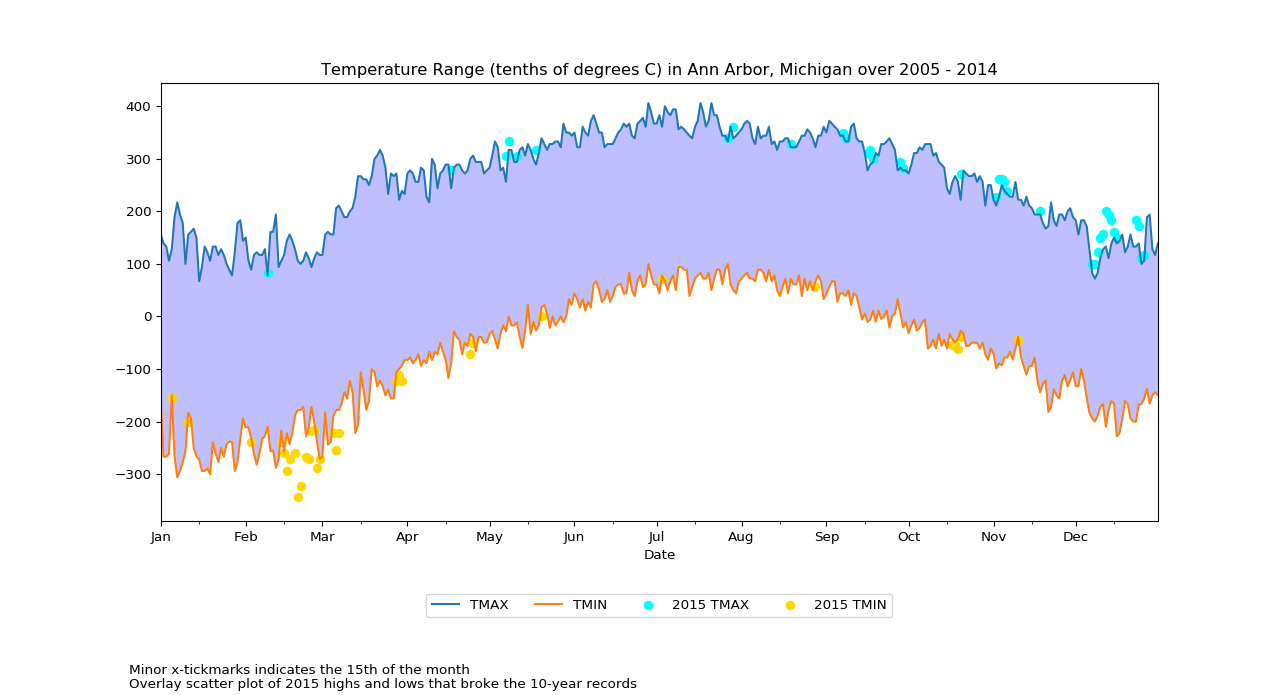

In [269]:
%matplotlib notebook
fig = plt.figure(figsize=(12,6))
tmax = plt.plot(table1.index, table1['TMAX'])
tmin = plt.plot(table1.index, table1['TMIN'])

#table1.plot(figsize=(10,6))    

#fill the area between the linear data and exponential data
plt.gca().fill_between(table1.index, 
                       table1['TMIN'], table1['TMAX'], 
                       facecolor='blue', 
                       alpha=0.25)                         
plt.xlabel('Date')
plt.title('Temperature Range (tenths of degrees C) in Ann Arbor, Michigan over 2005 - 2014')
plt.legend()

In [270]:
#Show 1st and 15th of the month in xticks
x = plt.gca().xaxis

# rotate the tick labels for the x axis
# for item in x.get_ticklabels():
#     item.set_rotation(45)
    
import matplotlib.dates as mdates
maj_locator = mdates.DayLocator(bymonthday=1, interval=1, tz=None)
min_locator = mdates.DayLocator(bymonthday=15, interval=1, tz=None)
x.set_major_locator(maj_locator)
x.set_minor_locator(min_locator)

maj_formatter= mdates.DateFormatter('%b')
min_formatter= mdates.DateFormatter('%d')
x.set_major_formatter(maj_formatter)
# x.set_minor_formatter(min_formatter)  #Comment out to show just tick mark without value

In [271]:
#Set xlim to elimiate side space
left, right = plt.xlim() 
print(mdates.num2date(left), mdates.num2date(right))

plt.xlim(table1.index.date[0], table1.index.date[-1])
plt.subplots_adjust(bottom=0.25)

2013-12-13 19:12:00+00:00 2015-01-18 04:48:00+00:00


(735234.0, 735598.0)

In [272]:
#Now get 2015 data
df15 = df['2015'].sort_index()
print('Data now subset to date between {} - {}'.format(df15.index[0], df15.index[-1]))
# len(df14) + len(df15) == len(df)

#Check last day in Feb = 28
print('Last day in 2015 Feb = ', df15['2015-02'].index[-1].day)
df15.head()
table2 = df15.pivot_table(index=df15.index.date, columns='Element', values='Data_Value', aggfunc=[np.max, np.min])
                          
table2.head()
table2.columns
table2 = table2.loc[: ,[('amax','TMAX'), ('amin','TMIN')]]
table2.columns = table2.columns.droplevel()
table2.head().append(table2.tail())

Data now subset to date between 2015-01-01 00:00:00 - 2015-12-31 00:00:00
Last day in 2015 Feb =  28


,ID,Element,Data_Value
Date,,,
2015-01-01,USC00205451,TMIN,-106
2015-01-01,USC00208972,TMIN,-106
2015-01-01,USC00207312,TMIN,-111
2015-01-01,USC00207312,TMAX,0
2015-01-01,USC00200032,TMIN,-94


amax      amin     
Element    TMAX TMIN TMAX TMIN
2015-01-01   11  -71  -67 -133
2015-01-02   39  -28  -22 -122
2015-01-03   39  -28    0  -67
2015-01-04   44    6    0  -88
2015-01-05   28  -89  -88 -155

MultiIndex(levels=[['amax', 'amin'], ['TMAX', 'TMIN']],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]],
           names=[None, 'Element'])

Element,TMAX,TMIN
2015-01-01,11,-133
2015-01-02,39,-122
2015-01-03,39,-67
2015-01-04,44,-88
2015-01-05,28,-155
2015-12-27,83,-6
2015-12-28,61,-39
2015-12-29,100,-39
2015-12-30,67,-22
2015-12-31,17,-56


In [273]:
#Reset date index to 2014 calendar dates to be consistent with table1 for plotting on the same axis
table2.set_index(table1.index, inplace=True)
table2.head().append(table2.tail())

Element,TMAX,TMIN
2014-01-01,11,-133
2014-01-02,39,-122
2014-01-03,39,-67
2014-01-04,44,-88
2014-01-05,28,-155
2014-12-27,83,-6
2014-12-28,61,-39
2014-12-29,100,-39
2014-12-30,67,-22
2014-12-31,17,-56


In [274]:
#Mask 2015 temperatures that didn't break 2005 - 2014 record high and low
table2['TMAX1'] = list(map(lambda x, y: x if x > y else np.nan, table2['TMAX'], table1['TMAX']))
table2['TMIN1'] = list(map(lambda x, y: x if x < y else np.nan, table2['TMIN'], table1['TMIN']))

#Check 2015 data against table1
table2.head()
table2[np.isnan(table2['TMAX1'])==False].head()
idx = table2[np.isnan(table2['TMAX1'])==False].head().index
table1.loc[idx]

table2[np.isnan(table2['TMIN1'])==False].head()
idx = table2[np.isnan(table2['TMIN1'])==False].head().index
table1.loc[idx]

Element,TMAX,TMIN,TMAX1,TMIN1
2014-01-01,11,-133,NaN,NaN
2014-01-02,39,-122,NaN,NaN
2014-01-03,39,-67,NaN,NaN
2014-01-04,44,-88,NaN,NaN
2014-01-05,28,-155,NaN,-155.0


Element,TMAX,TMIN,TMAX1,TMIN1
2014-02-09,83,-116,83.0,NaN
2014-04-17,278,44,278.0,NaN
2014-05-07,306,83,306.0,NaN
2014-05-08,333,89,333.0,NaN
2014-05-11,306,133,306.0,NaN


,TMAX,TMIN
2014-02-09,78,-210
2014-04-17,244,-89
2014-05-07,256,-28
2014-05-08,317,0
2014-05-11,294,-11


Element,TMAX,TMIN,TMAX1,TMIN1
2014-01-05,28,-155,NaN,-155.0
2014-01-11,6,-200,NaN,-200.0
2014-02-03,-21,-238,NaN,-238.0
2014-02-14,-27,-239,NaN,-239.0
2014-02-15,-39,-260,NaN,-260.0


,TMAX,TMIN
2014-01-05,128,-150
2014-01-11,156,-183
2014-02-03,89,-232
2014-02-14,106,-217
2014-02-15,117,-256


In [275]:
#Now scatter-plot 2015 highs and lows
scat_max=plt.scatter(x=table2.index, y=table2['TMAX1'], c='cyan')
scat_min=plt.scatter(x=table2.index, y=table2['TMIN1'], c='gold')

In [276]:
# scat_max.remove()
# scat_min.remove()

In [285]:
#Add caption
## Remove any existing figure text first
for txt in fig.texts:
    txt.set_visible(False)
txt =fig.text(0.1, 0.03, 'Minor x-tickmarks indicates the 15th of the month', horizontalalignment='left')
txt1 =fig.text(0.1, 0.01, 'Overlay scatter plot of 2015 highs and lows that broke the 10-year records', horizontalalignment='left')

In [278]:
handles, labels = plt.gca().get_legend_handles_labels()
print(*zip(handles, labels))

(<matplotlib.lines.Line2D object at 0x7f6a1dd8de10>, 'TMAX') (<matplotlib.lines.Line2D object at 0x7f6a1dde2470>, 'TMIN') (<matplotlib.collections.PathCollection object at 0x7f6a1dd89ef0>, 'TMAX1') (<matplotlib.collections.PathCollection object at 0x7f6a1dde2358>, 'TMIN1')


In [279]:
#Add legend
plt.legend(handles=handles, labels = ['TMAX', 'TMIN', '2015 TMAX', '2015 TMIN'], loc = 'upper center'
           , bbox_to_anchor = (0.5,-0.15), ncol=4)